This is notebook for test training runs

Loading libraries

In [1]:
#general libraries
import pandas as pd
import numpy as np
import copy
#project code
from FNN import FNN
from OptimizersFunctions import *
from ActivFunctions import  *
from LossFunctions import *
from SuppFunctions import *
from TestingFunctions import *

Tabular data

In [2]:
#path to data
path_data = "data\wdbc.data"#data from https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

In [3]:
columnNames = ["ID number","Diagnosis","radius1","texture1","perimeter1","area1","smoothness1","compactness1","concavity1","concave points1","symmetry1","fractal dimension1","radius2","texture2","perimeter2","area2","smoothness2","compactness2","concavity2","concave points2","symmetry2","fractal dimension2","radius3","texture3","perimeter3","area3","smoothness3","compactness3","concavity3","concave points3","symmetry3","fractal dimension3"]
#loading raw data 
data_raw = pd.read_csv(path_data,names = columnNames)
data_NoId = data_raw.drop(columns="ID number")#no need for id

Regression testing (on tabular data)

In [4]:
#selecting goal for analysis
regGoal = "radius1"
#setting general network hyperparameters'
epochs = 1000
batch_size = 12
loss_derivative = MeanSquaredErrorDerivative
size_test_set = 0.1
#sgd specific
learning_rate_sgd = 0.005
grad_clip_sgd = 10
#sgd_momentum specific
learning_rate_sgd_momentum = 0.001
grad_clip_sgd_momentum = 10
momentum_sgd_momentum = 0.95
#rmsprop specific
learning_rate_rmsprop = 0.001
grad_clip_rmsprop = 0
#nag specific
learning_rate_nag = 0.0005
grad_clip_nag = 10
momentum_nag = 0.6
#adam specific
learning_rate_adam = 0.005
grad_clip_adam = 0

In [5]:
#data preparation for regression training
data = data_NoId.drop(columns="Diagnosis")#categorical variable is unneeded
data = data.iloc[:,0:10]#using only mean features
dataInput = data.drop(columns=regGoal).to_numpy()
dataTarget = data.loc[:,regGoal].to_numpy()
dataInput = dataInput.T
dataTarget = dataTarget[np.newaxis,:]

In [6]:
#declaring network for regression task
netReg = FNN([9,64, 32, 16, 8, 4, 2, 1],
          [relu,identity],
          method_ini="HeUni"
)

In [7]:
#getting data split
n_samples = dataTarget.size
indices = np.arange(0,n_samples)
indices_test = np.random.permutation(round(n_samples*size_test_set))
indices_train = list(set(indices) - set(indices_test))

In [8]:
#getting train set
dataInput_train = dataInput[:,indices_train]
dataTarget_train = dataTarget[:,indices_train]
#getting test set
dataInput_test = dataInput[:,indices_test]
dataTarget_test = dataTarget[:,indices_test]
#standarizing data
meanDataInput_train = np.mean(dataInput_train, axis=1)
meanDataInput_train = meanDataInput_train[:,np.newaxis]
stdDataInput_train = np.std(dataInput_train, axis=1)
stdDataInput_train = stdDataInput_train[:,np.newaxis]
dataInput_train = (dataInput_train - meanDataInput_train) / stdDataInput_train
dataInput_test =  (dataInput_test - meanDataInput_train) / stdDataInput_train

In [9]:
#models training (different optimizer)
net_reg_sgd,_ = train_minibatch_sgd(copy.deepcopy(netReg), dataInput_train, dataTarget_train, epochs, learning_rate_sgd , batch_size, loss_derivative, grad_clip = grad_clip_sgd)
net_reg_sgd_momentum,_ = train_minibatch_sgd_momentum(copy.deepcopy(netReg), dataInput_train, dataTarget_train, epochs, learning_rate_sgd_momentum, batch_size, loss_derivative, momentum = momentum_sgd_momentum, grad_clip = grad_clip_sgd_momentum)
net_reg_rmsprop,_ = train_minibatch_rmsprop(copy.deepcopy(netReg), dataInput_train, dataTarget_train, epochs, learning_rate_rmsprop, batch_size, loss_derivative, grad_clip = grad_clip_rmsprop)
net_reg_nag,_ = train_minibatch_nag(copy.deepcopy(netReg), dataInput_train, dataTarget_train, epochs, learning_rate_nag, batch_size, loss_derivative, momentum = momentum_nag, grad_clip = grad_clip_nag)
net_reg_adam,_ = train_minibatch_adam(copy.deepcopy(netReg), dataInput_train, dataTarget_train, epochs, learning_rate_adam, batch_size, loss_derivative, grad_clip = grad_clip_adam)

In [10]:
#calculating error
error_reg_sgd = MeanSquaredError(dataTarget_test,net_reg_sgd.predictRegression(dataInput_test))
error_reg_momentum = MeanSquaredError(dataTarget_test,net_reg_sgd_momentum.predictRegression(dataInput_test))
error_reg_rmsprop = MeanSquaredError(dataTarget_test,net_reg_rmsprop.predictRegression(dataInput_test))
error_reg_nag = MeanSquaredError(dataTarget_test,net_reg_nag.predictRegression(dataInput_test))
error_reg_adam = MeanSquaredError(dataTarget_test,net_reg_adam.predictRegression(dataInput_test))

In [11]:
#Printing errors
print(f"Mean square error sgd: {error_reg_sgd}")
print(f"Mean square error momentum: {error_reg_momentum}")
print(f"Mean square error rmsprop: {error_reg_rmsprop}")
print(f"Mean square error nag: {error_reg_nag}")
print(f"Mean square error adam: {error_reg_adam}")

Mean square error sgd: 0.06059527542533534
Mean square error momentum: 0.0556949342579335
Mean square error rmsprop: 0.06168934713726001
Mean square error nag: 0.11779122174028088
Mean square error adam: 0.015959528064538864


Binary classification testing (on tabular data)

In [12]:
#setting general network hyperparameters'
epochs = 1000
batch_size = 12
loss_derivative = BinaryCrossEntropyDerivative
size_test_set = 0.1
#sgd specific
learning_rate_sgd = 0.005
grad_clip_sgd = 10
#sgd_momentum specific
learning_rate_sgd_momentum = 0.001
grad_clip_sgd_momentum = 10
momentum_sgd_momentum = 0.95
#rmsprop specific
learning_rate_rmsprop = 0.001
grad_clip_rmsprop = 0
#nag specific
learning_rate_nag = 0.0005
grad_clip_nag = 10
momentum_nag = 0.6
#adam specific
learning_rate_adam = 0.005
grad_clip_adam = 0

In [13]:
#data preparation for classification training
dataClass = data_NoId
dataInput= dataClass.iloc[:,1:].to_numpy()#all features without without diagn
dataTarget_desc = dataClass.loc[:,"Diagnosis"].to_numpy()
dataInput = dataInput.T
dataTarget_desc = dataTarget_desc[np.newaxis,:]
dataTarget_bin = np.zeros(dataTarget_desc.shape)
dataTarget_bin[dataTarget_desc == "M"] = 1


In [14]:
#getting data split
n_samples = dataTarget_bin.size
indices = np.arange(0,n_samples)
indices_test = np.random.permutation(round(n_samples*0.2))
indices_train = list(set(indices) - set(indices_test))

In [15]:
#getting train set
dataInput_train = dataInput[:,indices_train]
dataTarget_train = dataTarget_bin[:,indices_train]
#getting test set
dataInput_test = dataInput[:,indices_test]
dataTarget_test = dataTarget_bin[:,indices_test]
#standarizing data
meanDataInput_train = np.mean(dataInput_train, axis=1)
meanDataInput_train = meanDataInput_train[:,np.newaxis]
stdDataInput_train = np.std(dataInput_train, axis=1)
stdDataInput_train = stdDataInput_train[:,np.newaxis]
dataInput_train = (dataInput_train - meanDataInput_train) / stdDataInput_train
dataInput_test =  (dataInput_test - meanDataInput_train) / stdDataInput_train

In [16]:
#declaring network
netClassBin = FNN([30,64, 32, 16, 8, 4, 2, 1],
          [relu,sigmoid],
          method_ini="HeNor"
)

In [17]:
#models training (different optimizer)
net_classBin_sgd,_ = train_minibatch_sgd(copy.deepcopy(netClassBin), dataInput_train, dataTarget_train, epochs, learning_rate_sgd , batch_size, loss_derivative, grad_clip = grad_clip_sgd)
net_classBin_sgd_momentum,_ = train_minibatch_sgd_momentum(copy.deepcopy(netClassBin), dataInput_train, dataTarget_train, epochs, learning_rate_sgd_momentum, batch_size, loss_derivative, momentum = momentum_sgd_momentum, grad_clip = grad_clip_sgd_momentum)
net_classBin_rmsprop,_ = train_minibatch_rmsprop(copy.deepcopy(netClassBin), dataInput_train, dataTarget_train, epochs, learning_rate_rmsprop, batch_size, loss_derivative, grad_clip = grad_clip_rmsprop)
net_classBin_nag,_ = train_minibatch_nag(copy.deepcopy(netClassBin), dataInput_train, dataTarget_train, epochs, learning_rate_nag, batch_size, loss_derivative, momentum = momentum_nag, grad_clip = grad_clip_nag)
net_classBin_adam,_ = train_minibatch_adam(copy.deepcopy(netClassBin), dataInput_train, dataTarget_train, epochs, learning_rate_adam, batch_size, loss_derivative, grad_clip = grad_clip_adam)

In [18]:
#accuracy calculation
confMatComp_classBin_sgd = getConfMatCompBin(dataTarget_test,net_classBin_sgd.predictClassBinary(dataInput_test))
confMatComp_classBin_sgd_momentum = getConfMatCompBin(dataTarget_test,net_classBin_sgd_momentum.predictClassBinary(dataInput_test))
confMatComp_classBin_rmsprop = getConfMatCompBin(dataTarget_test,net_classBin_rmsprop.predictClassBinary(dataInput_test))
confMatComp_classBin_nag = getConfMatCompBin(dataTarget_test,net_classBin_nag.predictClassBinary(dataInput_test))
confMatComp_classBin_adam = getConfMatCompBin(dataTarget_test,net_classBin_adam.predictClassBinary(dataInput_test))

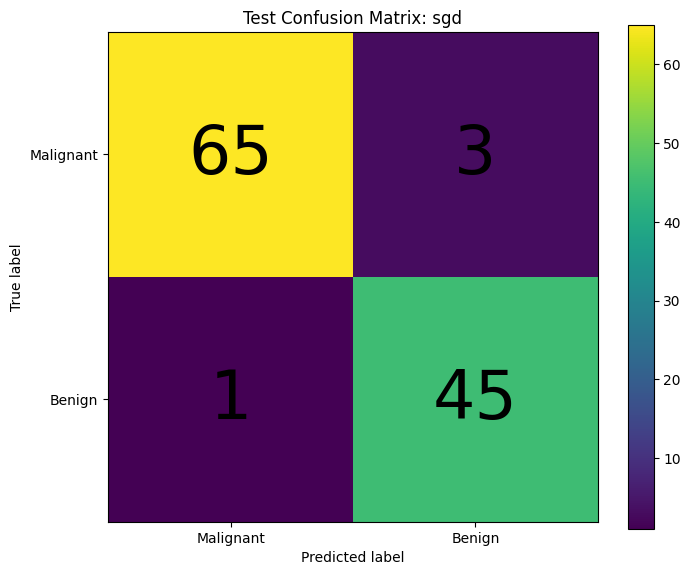

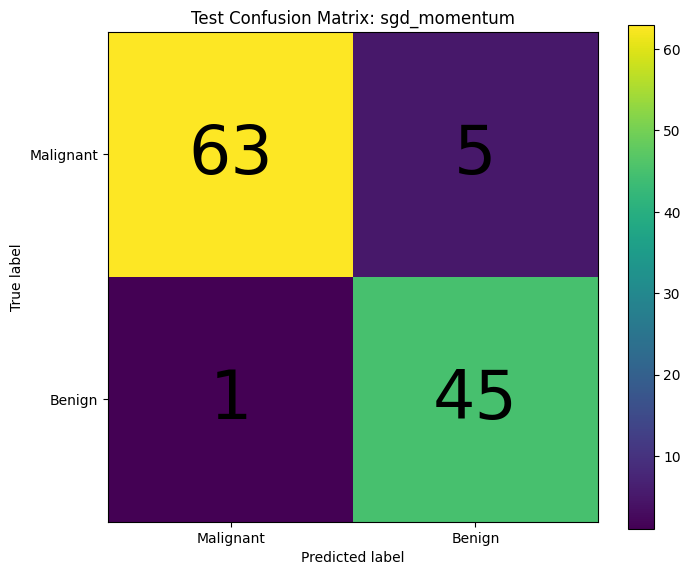

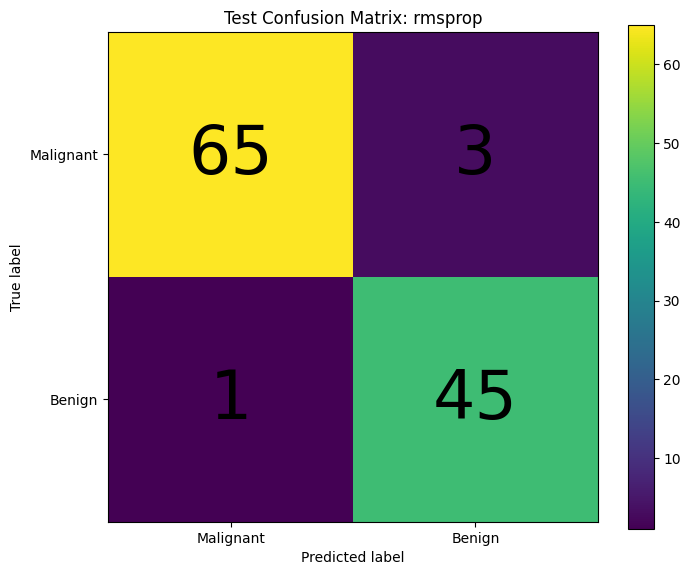

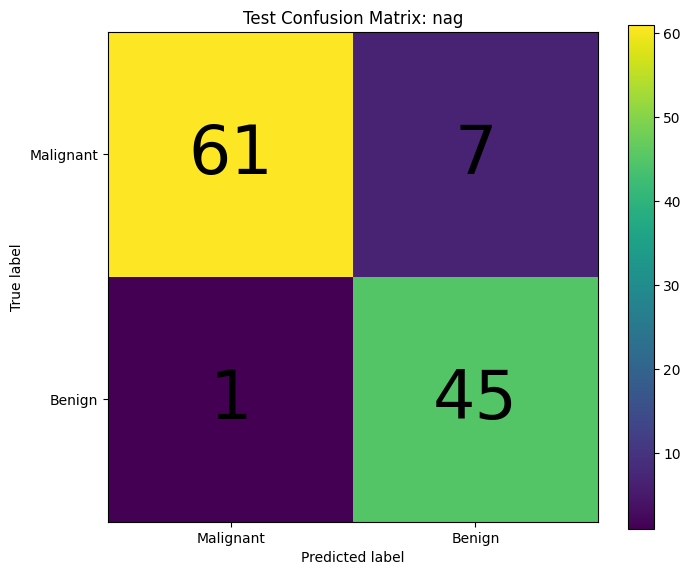

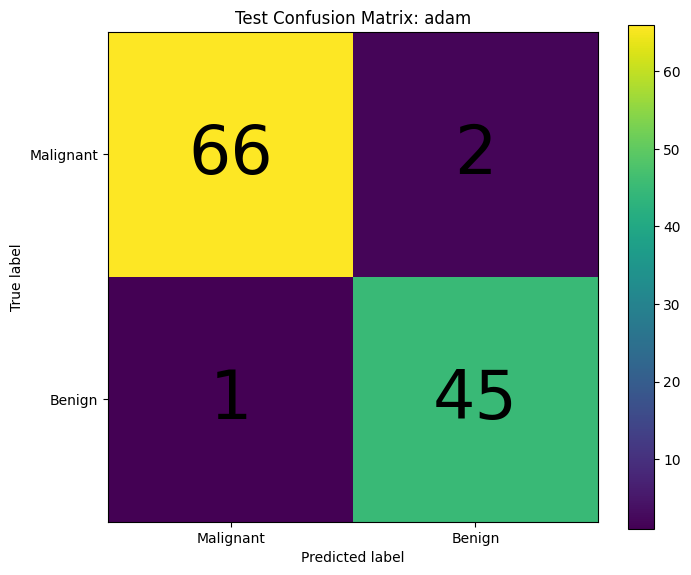

In [19]:
#gettign clas names for visualization
TAB_CLASSES = ["Benign","Malignant"]
#plotting confusion matrices
plotConfMatBin(confMatComp_classBin_sgd,TAB_CLASSES,title="Test Confusion Matrix: sgd")
plotConfMatBin(confMatComp_classBin_sgd_momentum,TAB_CLASSES,title="Test Confusion Matrix: sgd_momentum")
plotConfMatBin(confMatComp_classBin_rmsprop,TAB_CLASSES,title="Test Confusion Matrix: rmsprop")
plotConfMatBin(confMatComp_classBin_nag,TAB_CLASSES,title="Test Confusion Matrix: nag")
plotConfMatBin(confMatComp_classBin_adam,TAB_CLASSES,title="Test Confusion Matrix: adam")

In [20]:
#getting accuracy
accuracy_classBin_sgd = getAccuracyBin(confMatComp_classBin_sgd[0],confMatComp_classBin_sgd[1],confMatComp_classBin_sgd[2],confMatComp_classBin_sgd[3])
accuracy_classBin_momentum = getAccuracyBin(confMatComp_classBin_sgd_momentum[0],confMatComp_classBin_sgd_momentum[1],confMatComp_classBin_sgd_momentum[2],confMatComp_classBin_sgd_momentum[3])
accuracy_classBin_rmsprop = getAccuracyBin(confMatComp_classBin_rmsprop[0],confMatComp_classBin_rmsprop[1],confMatComp_classBin_rmsprop[2],confMatComp_classBin_rmsprop[3])
accuracy_classBin_nag = getAccuracyBin(confMatComp_classBin_nag[0],confMatComp_classBin_nag[1],confMatComp_classBin_nag[2],confMatComp_classBin_nag[3])
accuracy_classBin_adam = getAccuracyBin(confMatComp_classBin_adam[0],confMatComp_classBin_adam[1],confMatComp_classBin_adam[2],confMatComp_classBin_adam[3])
#printing accuracy
print(f"Accuracy sgd: {accuracy_classBin_sgd}")
print(f"Accuracy momentum: {accuracy_classBin_momentum}")
print(f"Accuracy rmsprop: {accuracy_classBin_rmsprop}")
print(f"Accuracy nag: {accuracy_classBin_nag}")
print(f"Accuracy adam: {accuracy_classBin_adam}")

Accuracy sgd: 0.9649122807017544
Accuracy momentum: 0.9473684210526315
Accuracy rmsprop: 0.9649122807017544
Accuracy nag: 0.9298245614035088
Accuracy adam: 0.9736842105263158


In [21]:
#getting Precision
precision_classBin_sgd = getPrecisionBin(confMatComp_classBin_sgd[0],confMatComp_classBin_sgd[2])
precision_classBin_momentum = getPrecisionBin(confMatComp_classBin_sgd_momentum[0],confMatComp_classBin_sgd_momentum[2])
precision_classBin_rmsprop = getPrecisionBin(confMatComp_classBin_rmsprop[0],confMatComp_classBin_rmsprop[2])
precision_classBin_nag = getPrecisionBin(confMatComp_classBin_nag[0],confMatComp_classBin_nag[2])
precision_classBin_adam = getPrecisionBin(confMatComp_classBin_adam[0],confMatComp_classBin_adam[2])
#printing Precision
print(f"Precision sgd: {precision_classBin_sgd}")
print(f"Precision momentum: {precision_classBin_momentum}")
print(f"Precision rmsprop: {precision_classBin_rmsprop}")
print(f"Precision nag: {precision_classBin_nag}")
print(f"Precision adam: {precision_classBin_adam}")

Precision sgd: 0.9848484848484849
Precision momentum: 0.984375
Precision rmsprop: 0.9848484848484849
Precision nag: 0.9838709677419355
Precision adam: 0.9850746268656716


In [22]:
#getting Recall
recall_classBin_sgd = getRecallBin(confMatComp_classBin_sgd[0],confMatComp_classBin_sgd[3])
recall_classBin_momentum = getRecallBin(confMatComp_classBin_sgd_momentum[0],confMatComp_classBin_sgd_momentum[3])
recall_classBin_rmsprop = getRecallBin(confMatComp_classBin_rmsprop[0],confMatComp_classBin_rmsprop[3])
recall_classBin_nag = getRecallBin(confMatComp_classBin_nag[0],confMatComp_classBin_nag[3])
recall_classBin_adam = getRecallBin(confMatComp_classBin_adam[0],confMatComp_classBin_adam[3])
#printing Recall
print(f"Recall sgd: {recall_classBin_sgd}")
print(f"Recall momentum: {recall_classBin_momentum}")
print(f"Recall rmsprop: {recall_classBin_rmsprop}")
print(f"Recall nag: {recall_classBin_nag}")
print(f"Recall adam: {recall_classBin_adam}")

Recall sgd: 0.9558823529411765
Recall momentum: 0.9264705882352942
Recall rmsprop: 0.9558823529411765
Recall nag: 0.8970588235294118
Recall adam: 0.9705882352941176


Multi-class classification (on MNIST dataset)

In [23]:
#getting the data for multi class classification (no need to have data physically downloaded)
import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [24]:
#setting general network hyperparameters'
epochs = 20
batch_size = 128
loss_derivative = CrossEntropyDerivative
size_test_set = 0.1
#sgd specific
learning_rate_sgd = 0.0001
grad_clip_sgd = 10
#sgd_momentum specific
learning_rate_sgd_momentum = 0.0001
grad_clip_sgd_momentum = 10
momentum_sgd_momentum = 0.95
#rmsprop specific
learning_rate_rmsprop = 0.0001
grad_clip_rmsprop = 0
#nag specific
learning_rate_nag = 0.0001
grad_clip_nag = 10
momentum_nag = 0.6
#adam specific
learning_rate_adam = 0.0001
grad_clip_adam = 0

In [25]:
#preparing dataset for training and testing
x_train_flattened = x_train.reshape(x_train.shape[0],-1)
x_test_flattened = x_test.reshape(x_test.shape[0],-1)
y_train_flattened = y_train.reshape(-1)
y_test_flattened = y_test.reshape(-1)
#one_hot_encoding targets(y)
dataTarget_train = one_hot_encode(y_train_flattened.T,10)
dataTarget_test = one_hot_encode(y_test_flattened.T,10)
#normalization(plus transpose to allign dataset to network architecture)
dataInput_train = (x_train_flattened.T/255.0)
dataInput_test =  (x_test_flattened.T/255.0)

In [26]:
#declaring network
netClassMulti = FNN([784,1024,512, 256, 128, 10],
          [relu,softmax],
          method_ini="HeNor"
)

In [27]:
#models training (different optimizer)
net_classMulti_sgd,_ = train_minibatch_sgd(copy.deepcopy(netClassMulti), dataInput_train, dataTarget_train, epochs, learning_rate_sgd , batch_size, loss_derivative, grad_clip = grad_clip_sgd)
net_classMulti_sgd_momentum,_ = train_minibatch_sgd_momentum(copy.deepcopy(netClassMulti), dataInput_train, dataTarget_train, epochs, learning_rate_sgd_momentum, batch_size, loss_derivative, momentum = momentum_sgd_momentum, grad_clip = grad_clip_sgd_momentum)
net_classMulti_rmsprop,_ = train_minibatch_rmsprop(copy.deepcopy(netClassMulti), dataInput_train, dataTarget_train, epochs, learning_rate_rmsprop, batch_size, loss_derivative, grad_clip = grad_clip_rmsprop)
net_classMulti_nag,_ = train_minibatch_nag(copy.deepcopy(netClassMulti), dataInput_train, dataTarget_train, epochs, learning_rate_nag, batch_size, loss_derivative,momentum = momentum_nag, grad_clip = grad_clip_nag)
net_classMulti_adam,_ = train_minibatch_adam(copy.deepcopy(netClassMulti), dataInput_train, dataTarget_train, epochs, learning_rate_adam, batch_size, loss_derivative, grad_clip = grad_clip_adam)

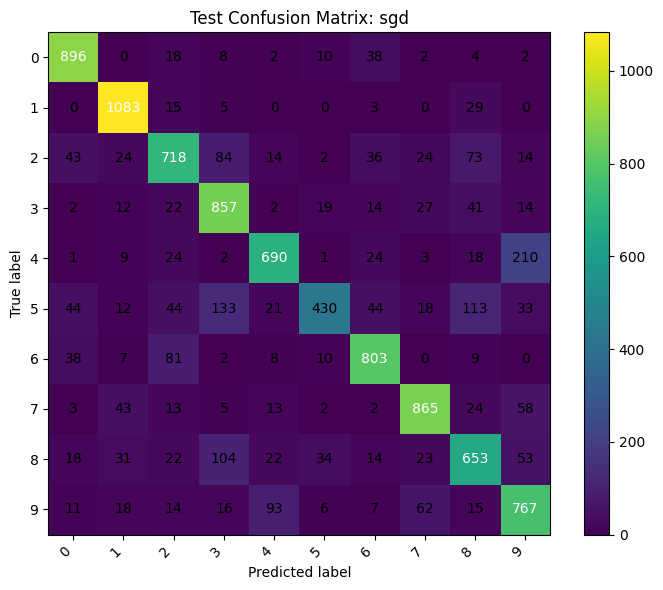

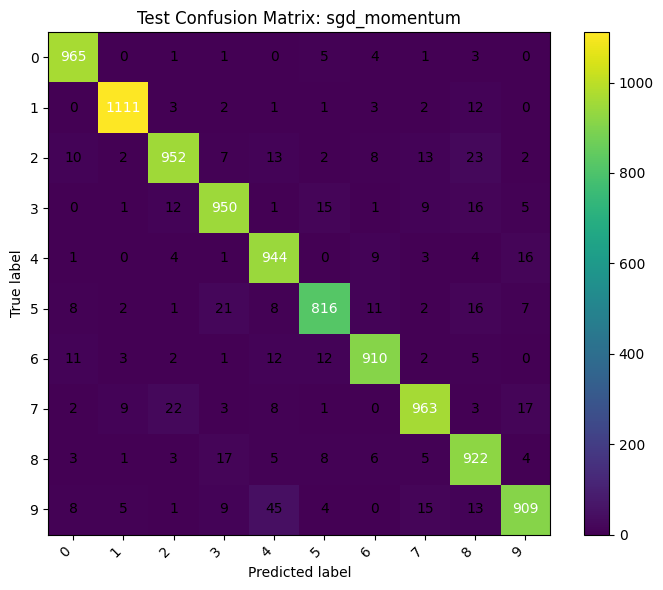

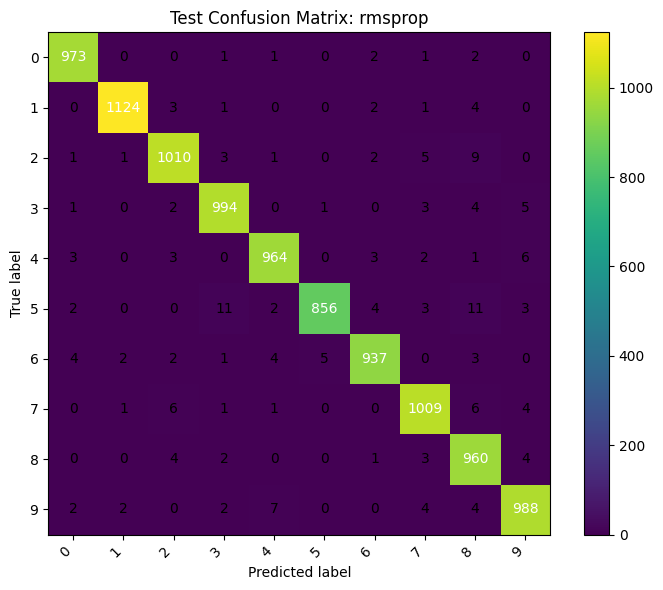

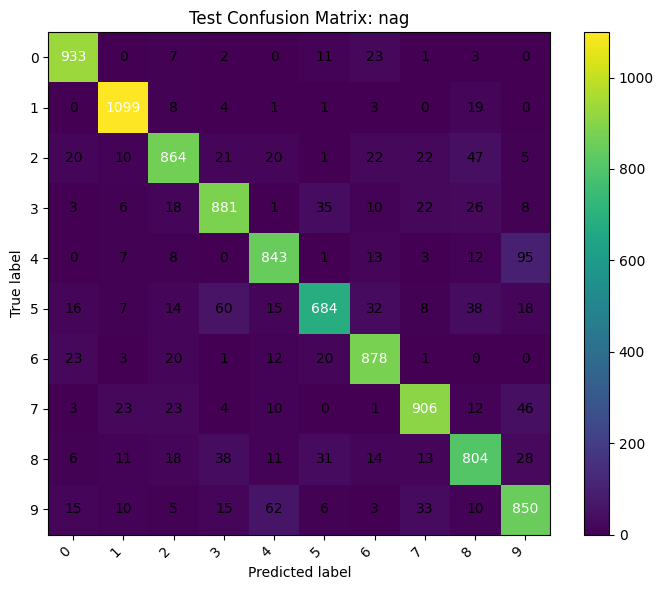

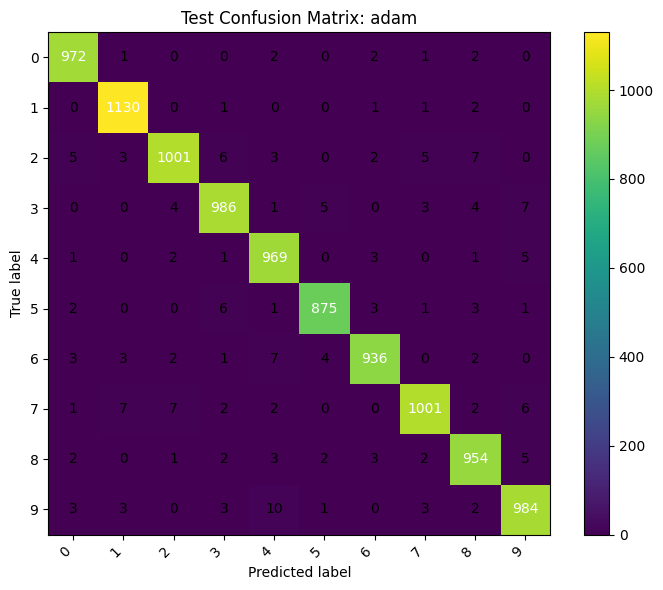

Accuracy sgd: 0.7762
Accuracy momentum: 0.9442
Accuracy rmsprop: 0.9815
Accuracy nag: 0.8742
Accuracy adam: 0.9808


In [28]:
#getting names and number of classes
MNIST_CLASSES = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
num_classes = len(MNIST_CLASSES)
#decoding test set
dataTarget_test_decode = one_hot_decode(dataTarget_test)
#getting predictions
predi_classMulti_sgd = net_classMulti_sgd.predictClassMulti(dataInput_test)
predi_classMulti_sgd_momentum = net_classMulti_sgd_momentum.predictClassMulti(dataInput_test)
predi_classMulti_rmsprop = net_classMulti_rmsprop.predictClassMulti(dataInput_test)
predi_classMulti_nag = net_classMulti_nag.predictClassMulti(dataInput_test)
predi_classMulti_adam = net_classMulti_adam.predictClassMulti(dataInput_test)
#getting confusion matrices
cm_classMulti_sgd = getConfMatCompMulti(dataTarget_test_decode, predi_classMulti_sgd, num_classes)
cm_classMulti_sgd_momentum = getConfMatCompMulti(dataTarget_test_decode, predi_classMulti_sgd_momentum,num_classes)
cm_classMulti_rmsprop = getConfMatCompMulti(dataTarget_test_decode, predi_classMulti_rmsprop,num_classes)
cm_classMulti_nag = getConfMatCompMulti(dataTarget_test_decode, predi_classMulti_nag,num_classes)
cm_classMulti_adam = getConfMatCompMulti(dataTarget_test_decode, predi_classMulti_adam,num_classes)
#plotting confusion matrices
plotConfMatMulti(cm_classMulti_sgd, class_names = MNIST_CLASSES, title="Test Confusion Matrix: sgd")
plotConfMatMulti(cm_classMulti_sgd_momentum, class_names = MNIST_CLASSES, title="Test Confusion Matrix: sgd_momentum")
plotConfMatMulti(cm_classMulti_rmsprop, class_names = MNIST_CLASSES, title="Test Confusion Matrix: rmsprop")
plotConfMatMulti(cm_classMulti_nag, class_names = MNIST_CLASSES, title="Test Confusion Matrix: nag")
plotConfMatMulti(cm_classMulti_adam, class_names = MNIST_CLASSES, title="Test Confusion Matrix: adam")
#accuracy calculation
accuracy_classMulti_sgd = getAccuracy(dataTarget_test_decode,predi_classMulti_sgd)
accuracy_classMulti_momentum = getAccuracy(dataTarget_test_decode,predi_classMulti_sgd_momentum)
accuracy_classMulti_rmsprop = getAccuracy(dataTarget_test_decode,predi_classMulti_rmsprop)
accuracy_classMulti_nag = getAccuracy(dataTarget_test_decode,predi_classMulti_nag)
accuracy_classMulti_adam = getAccuracy(dataTarget_test_decode,predi_classMulti_adam)
#printing accuracy
print(f"Accuracy sgd: {accuracy_classMulti_sgd}")
print(f"Accuracy momentum: {accuracy_classMulti_momentum}")
print(f"Accuracy rmsprop: {accuracy_classMulti_rmsprop}")
print(f"Accuracy nag: {accuracy_classMulti_nag}")
print(f"Accuracy adam: {accuracy_classMulti_adam}")

Multi-class classification (on CIFAR-10 dataset)

In [29]:
#getting CIFAR-10 dataset (no need to have data physically downloaded)
import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [30]:
#setting general network hyperparameters'
epochs = 20
batch_size = 128
loss_derivative = SoftmaxCrossEntropyDerivative
size_test_set = 0.1
#sgd specific
learning_rate_sgd = 0.0001
grad_clip_sgd = 10
#sgd_momentum specific
learning_rate_sgd_momentum = 0.0001
grad_clip_sgd_momentum = 10
momentum_sgd_momentum = 0.95
#rmsprop specific
learning_rate_rmsprop = 0.0001
grad_clip_rmsprop = 0
#nag specific
learning_rate_nag = 0.0001
grad_clip_nag = 10
momentum_nag = 0.6
#adam specific
learning_rate_adam = 0.0001
grad_clip_adam = 0

In [31]:
#preparing dataset for training and testing
x_train_flattened = x_train.reshape(x_train.shape[0],-1)
x_test_flattened = x_test.reshape(x_test.shape[0],-1)
y_train_flattened = y_train.reshape(-1)
y_test_flattened = y_test.reshape(-1)
#one_hot_encoding targets(y)
dataTarget_train = one_hot_encode(y_train_flattened.T,10)
dataTarget_test = one_hot_encode(y_test_flattened.T,10)
#normalization(plus transpose to allign dataset to network architecture)
dataInput_train = (x_train_flattened.T/255.0)
dataInput_test =  (x_test_flattened.T/255.0)

In [32]:
#declaring network
netClassMulti = FNN([3072,1024,512, 256, 128, 10],
          [relu,softmax],
          method_ini="HeNor"
)

In [33]:
#models training (different optimizer)
net_classMulti_sgd,_ = train_minibatch_sgd(copy.deepcopy(netClassMulti), dataInput_train, dataTarget_train, epochs, learning_rate_sgd , batch_size, loss_derivative, grad_clip = grad_clip_sgd)
net_classMulti_sgd_momentum,_ = train_minibatch_sgd_momentum(copy.deepcopy(netClassMulti), dataInput_train, dataTarget_train, epochs, learning_rate_sgd_momentum, batch_size, loss_derivative, momentum = momentum_sgd_momentum, grad_clip = grad_clip_sgd_momentum)
net_classMulti_rmsprop,_ = train_minibatch_rmsprop(copy.deepcopy(netClassMulti), dataInput_train, dataTarget_train, epochs, learning_rate_rmsprop, batch_size, loss_derivative, grad_clip = grad_clip_rmsprop)
net_classMulti_nag,_ = train_minibatch_nag(copy.deepcopy(netClassMulti), dataInput_train, dataTarget_train, epochs, learning_rate_nag, batch_size, loss_derivative, momentum = momentum_nag, grad_clip = grad_clip_nag)
net_classMulti_adam,_ = train_minibatch_adam(copy.deepcopy(netClassMulti), dataInput_train, dataTarget_train, epochs, learning_rate_adam, batch_size, loss_derivative, grad_clip = grad_clip_adam)

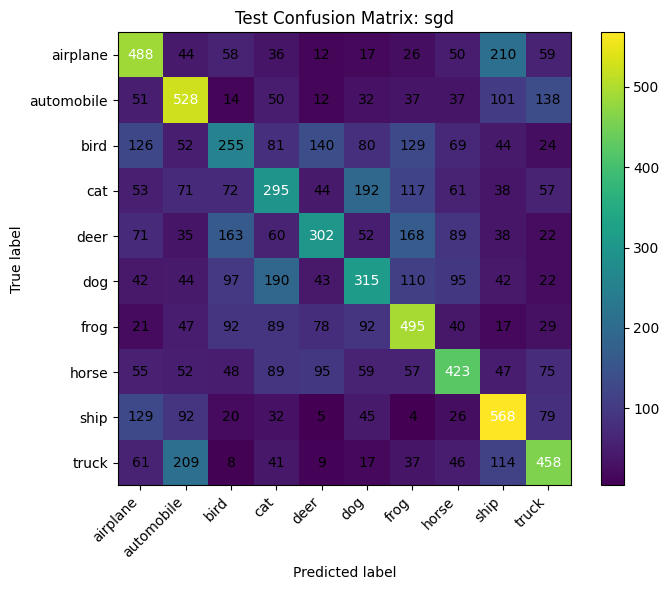

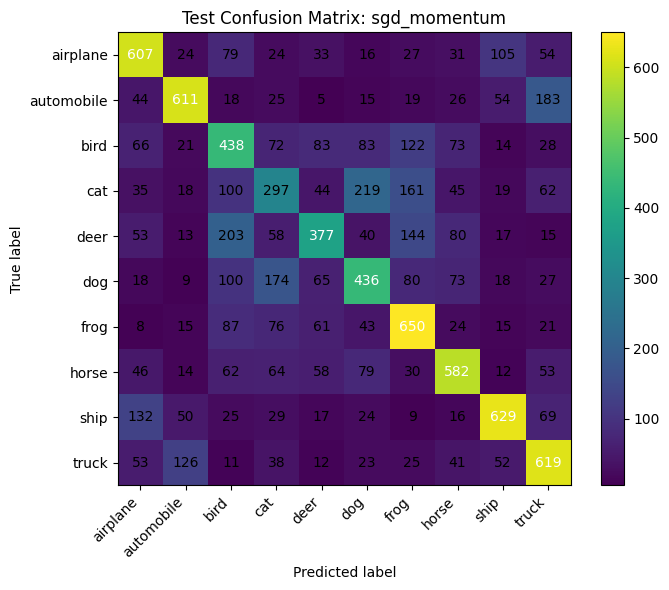

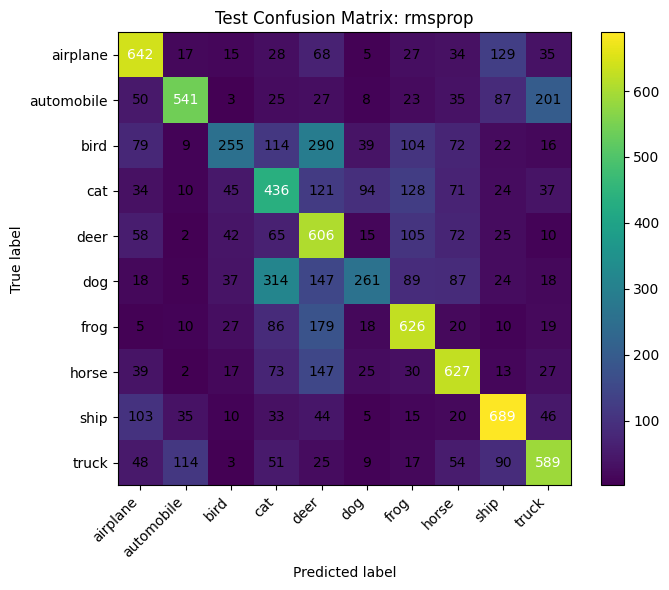

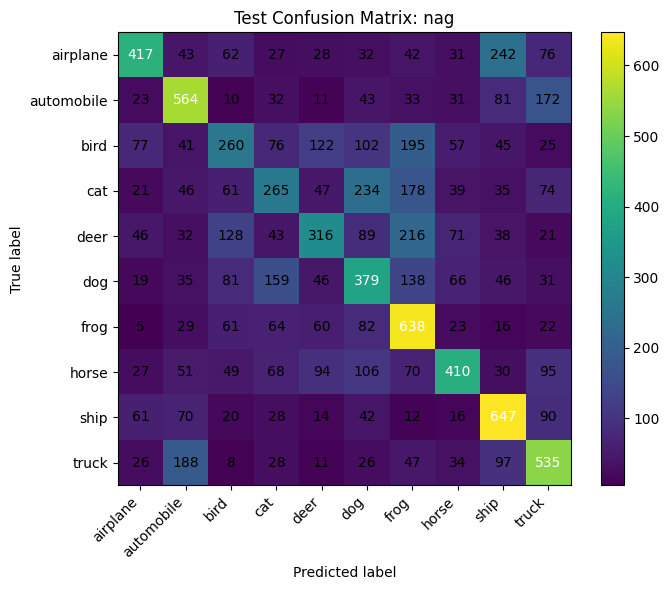

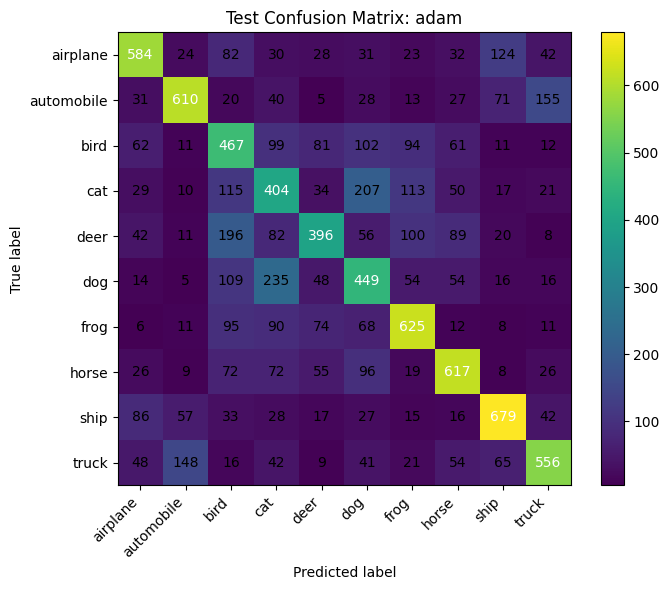

Accuracy sgd: 0.4127
Accuracy momentum: 0.5246
Accuracy rmsprop: 0.5272
Accuracy nag: 0.4431
Accuracy adam: 0.5387


In [34]:
#getting names and number of classes
CIFAR_CLASSES = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"] 
num_classes = len(CIFAR_CLASSES)
#decoding test set
dataTarget_test_decode = one_hot_decode(dataTarget_test)
#getting predictions
predi_classMulti_sgd = net_classMulti_sgd.predictClassMulti(dataInput_test)
predi_classMulti_sgd_momentum = net_classMulti_sgd_momentum.predictClassMulti(dataInput_test)
predi_classMulti_rmsprop = net_classMulti_rmsprop.predictClassMulti(dataInput_test)
predi_classMulti_nag = net_classMulti_nag.predictClassMulti(dataInput_test)
predi_classMulti_adam = net_classMulti_adam.predictClassMulti(dataInput_test)
#getting confusion matrices
cm_classMulti_sgd = getConfMatCompMulti(dataTarget_test_decode, predi_classMulti_sgd, num_classes)
cm_classMulti_sgd_momentum = getConfMatCompMulti(dataTarget_test_decode, predi_classMulti_sgd_momentum, num_classes)
cm_classMulti_rmsprop = getConfMatCompMulti(dataTarget_test_decode, predi_classMulti_rmsprop, num_classes)
cm_classMulti_nag = getConfMatCompMulti(dataTarget_test_decode, predi_classMulti_nag, num_classes)
cm_classMulti_adam = getConfMatCompMulti(dataTarget_test_decode, predi_classMulti_adam, num_classes)
#plotting confusion matrices
plotConfMatMulti(cm_classMulti_sgd, CIFAR_CLASSES, title="Test Confusion Matrix: sgd")
plotConfMatMulti(cm_classMulti_sgd_momentum, CIFAR_CLASSES, title="Test Confusion Matrix: sgd_momentum")
plotConfMatMulti(cm_classMulti_rmsprop, CIFAR_CLASSES, title="Test Confusion Matrix: rmsprop")
plotConfMatMulti(cm_classMulti_nag, CIFAR_CLASSES, title="Test Confusion Matrix: nag")
plotConfMatMulti(cm_classMulti_adam, CIFAR_CLASSES, title="Test Confusion Matrix: adam")
#accuracy calculation
accuracy_classMulti_sgd = getAccuracy(dataTarget_test_decode,predi_classMulti_sgd)
accuracy_classMulti_momentum = getAccuracy(dataTarget_test_decode,predi_classMulti_sgd_momentum)
accuracy_classMulti_rmsprop = getAccuracy(dataTarget_test_decode,predi_classMulti_rmsprop)
accuracy_classMulti_nag = getAccuracy(dataTarget_test_decode,predi_classMulti_nag)
accuracy_classMulti_adam = getAccuracy(dataTarget_test_decode,predi_classMulti_adam)
#printing accuracy
print(f"Accuracy sgd: {accuracy_classMulti_sgd}")
print(f"Accuracy momentum: {accuracy_classMulti_momentum}")
print(f"Accuracy rmsprop: {accuracy_classMulti_rmsprop}")
print(f"Accuracy nag: {accuracy_classMulti_nag}")
print(f"Accuracy adam: {accuracy_classMulti_adam}")